In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import os
import warnings
from numpy import exp
from matplotlib import rc
from matplotlib.offsetbox import AnchoredText
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
warnings.simplefilter('ignore')
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:
font_size = 10
font = {'family':'sans-serif','weight':'regular', 'style':'normal','size':font_size }
mpl.rc('font', **font)
mpl. rc('text', usetex=True) 
plt.rcParams['text.latex.preamble'] = [
       r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
       r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
       r'\usepackage{helvet}',    # set the normal font here
       r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
       r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
]

plt.rcParams['mathtext.fontset'] = 'cm'

plt.rcParams['legend.title_fontsize'] = font_size

In [3]:
## Inputs
um = '3'; sw = '075'
gen=2000; TT=np.linspace(2,gen,int(gen-1),dtype=int); runs=50
BM = 500 ; MM = 1300; B = 1500
warnings.simplefilter('ignore')

In [4]:
flist = [0.0,0.1,0.5]
labels2 = ['$0$','$0.1$','$0.5$']

case=[x for x in labels2]
size=(runs,len(TT)); 
m1_all=np.ones(size); m2_all=np.ones(size); n1_all=np.ones(size); n2_all=np.ones(size); n3_all=np.ones(size)
m1avg=[[0]]*len(case); m1std=[[0]]*len(case)
m2avg=[[0]]*len(case); m2std=[[0]]*len(case)
n1avg=[[0]]*len(case); n1std=[[0]]*len(case)
n2avg=[[0]]*len(case); n2std=[[0]]*len(case)
n3avg=[[0]]*len(case); n3std=[[0]]*len(case)

s10_all=np.ones(size); s01_all=np.ones(size);
s10avg=[[0]]*len(case); s10std=[[0]]*len(case)
s01avg=[[0]]*len(case); s01std=[[0]]*len(case)

for c in range(len(case)):
    f=flist[c]
    path = "./mut-ratio-"+um+"/sw_"+sw+"/f_0"+str(int(f*10))
    for i in range(runs):
        counter=str(i+1).zfill(2)
        arr_txt = path+'/'+[x for x in os.listdir(path) if x.startswith("run_"+counter)][-1]
        y = [x for x in os.listdir(arr_txt) if x.endswith("count-mut.dat")][0]
        inp = open (arr_txt+'/'+y)
        m1aux=[]; m2aux=[]
        n1aux=[]; n2aux=[]; n3aux=[]
        s10aux=[]; s01aux=[]
        if f==0: N1_0=1
        else: N1_0 = f*BM*MM
        N0_0 = (1-f)*BM*MM
        for line in inp.readlines():
            p=line.split()
            m1aux.append((N1_0-float(p[0]))/N1_0)
            m2aux.append(float(p[1])/N0_0)
            n1aux.append(float(p[2])/N1_0)
            n2aux.append(float(p[3])/N0_0)
            n3aux.append(float(p[4])/((B-BM)*MM))
            s10aux.append(float(p[5])/N1_0)
            s01aux.append(float(p[6])/N0_0)
        inp.close()
        m1_all[i]=m1aux; m2_all[i]=m2aux
        n1_all[i]=n1aux; n2_all[i]=n2aux; n3_all[i]=n3aux
        s10_all[i]=s10aux; s01_all[i]=s01aux
    m1avg[c] = m1_all.mean(axis=0); m1std[c] = m1_all.std(axis=0)
    m2avg[c] = m2_all.mean(axis=0); m2std[c] = m2_all.std(axis=0)
    n1avg[c] = n1_all.mean(axis=0); n1std[c] = n1_all.std(axis=0)
    n2avg[c] = n2_all.mean(axis=0); n2std[c] = n2_all.std(axis=0)
    n3avg[c] = n3_all.mean(axis=0); n3std[c] = n3_all.std(axis=0)
    s10avg[c] = s10_all.mean(axis=0); s10std[c] = s10_all.std(axis=0)
    s01avg[c] = s01_all.mean(axis=0); s01std[c] = s01_all.std(axis=0)

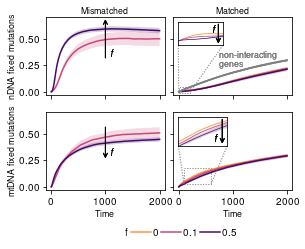

In [5]:
cm = 1/2.54  # centimeters in inches

colorlist=["#f89540","#cc4778","#420a68"]

plt.rcParams.update(  {'figure.figsize': (8.7*cm,6.1*cm)})
fig = plt.figure(constrained_layout=False)


gs1 = fig.add_gridspec(1,2, left=0, right=1, wspace=0.07, top=1, bottom=0.55)
gs2 = fig.add_gridspec(1,2, left=0, right=1, wspace=0.07, top=0.45, bottom=0)

ax0 = fig.add_subplot(gs1[0])
ax1 = fig.add_subplot(gs1[1],sharex=ax0,sharey=ax0)

ax0.text(0.5,1.08,"Mismatched",horizontalalignment='center',verticalalignment='center',size=9,transform = ax0.transAxes,weight="bold")
ax1.text(0.5,1.08,"Matched",horizontalalignment='center',verticalalignment='center',size=9,transform = ax1.transAxes,weight="bold")
axins = zoomed_inset_axes(ax1, 4.1, loc=2)

axs0 = fig.add_subplot(gs2[0],sharey=ax0)
axs1 = fig.add_subplot(gs2[1],sharex=axs0,sharey=axs0)
axins3 = zoomed_inset_axes(axs1, 1.8, loc=2)

for c in range(1,len(case)):
    ax0.plot(TT,n1avg[c],c=colorlist[c])
    ax0.fill_between(TT, n1avg[c]+n1std[c], n1avg[c]-n1std[c], facecolor=colorlist[c], alpha=0.2)
#     ax0.set_ylabel(r"nDNA subs per gene",fontsize=9)
    ax0.set_ylabel(r"nDNA fixed mutations",fontsize=9)
    ax0.annotate("", xy=(1000, 0.7), xycoords='data', xytext=(1000, 0.3),textcoords='data',arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
    ax0.text(1080, 0.35, r"$f$", ha="left", va="center", size=font_size)
    ax0.set_ylim(-0.03, .7)
    
for c in range(len(case)):    
    ax1.plot(TT,n2avg[c],c=colorlist[c],label=labels2[c])
    ax1.fill_between(TT, n2avg[c]+n2std[c], n2avg[c]-n2std[c], facecolor=colorlist[c], alpha=0.2)
    plt.setp(ax1.get_yticklabels(), visible=False)
    
    axins.fill_between(TT, n2avg[c]+n2std[c], n2avg[c]-n2std[c], facecolor=colorlist[c], alpha=0.2)
    axins.plot(TT,n2avg[c],c=colorlist[c],linewidth=0.7)
    axins.set_xlim(0, 200)
    axins.set_ylim(-0.01, .043)
    axins.set_xticks([])
    axins.set_yticks([])
    plt.xticks(visible=False)
    plt.yticks(visible=False)
    mark_inset(ax1, axins, loc1=3, loc2=4, fc="none", ec="0.5", ls= 'dotted',alpha=0.5)
    
    axins.annotate("", xy=(180, -0.01), xycoords='data', xytext=(180, 0.043),textcoords='data',arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
    axins.text(150, 0.025, r"$f$", ha="left", va="center", size=font_size)
    
h, l = ax1.get_legend_handles_labels()
ph = [plt.plot([],marker="", ls="")[0]]
handles = ph + h
labels = ["f"] + l
leg=ax1.legend(handles, labels, ncol=4,columnspacing=0.3,handletextpad=0.2,frameon=False,fontsize=font_size,bbox_to_anchor=(0.6,-1.6))
for vpack in leg._legend_handle_box.get_children()[:1]:
    for hpack in vpack.get_children():
        hpack.get_children()[0].set_width(0) 

for c in range(len(case)): 
    ax1.plot(TT,n3avg[c],c='0.5')
    ax1.fill_between(TT, n3avg[c]+n3std[c], n3avg[c]-n3std[c], facecolor='0.6', alpha=0.2)
    t = ax1.text(735, 0.3, r"non-interacting" "\n" "genes", ha="left", va="center", size=9,color = '0.5')
    
plt.setp(ax0.get_xticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)       
    
for c in range(1,len(case)):
    axs0.plot(TT,s10avg[c],c=colorlist[c])
    axs0.fill_between(TT, s10avg[c]+s10std[c], s10avg[c]-s10std[c], facecolor=colorlist[c], alpha=0.2)
#     axs0.set_ylabel(r"mtDNA subs per gene",fontsize=9)
    axs0.set_ylabel(r"mtDNA fixed mutations",fontsize=9)
    axs0.annotate("", xy=(1000, 0.25), xycoords='data', xytext=(1000, 0.58),textcoords='data',arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
    axs0.text(1080, 0.32, r"$f$", ha="left", va="center", size=font_size)
    axs0.set_xlabel('Time',fontsize=9)
    
for c in range(len(case)):    
    axs1.plot(TT,s01avg[c],c=colorlist[c])
    axs1.fill_between(TT, s01avg[c]+s01std[c], s01avg[c]-s01std[c], facecolor=colorlist[c], alpha=0.2)
    plt.setp(axs1.get_yticklabels(), visible=False)
    axs1.set_xlabel('Time',fontsize=9)
    
    axins3.fill_between(TT, s01avg[c]+s01std[c], s01avg[c]-s01std[c], facecolor=colorlist[c], alpha=0.2)
    axins3.plot(TT,s01avg[c],c=colorlist[c],linewidth=0.7)
    axins3.set_xlim(100, 600)
    axins3.set_ylim(0.03,0.18)
    axins3.set_xticks([])
    axins3.set_yticks([])
    plt.xticks(visible=False)
    plt.yticks(visible=False)
    mark_inset(axs1, axins3, loc1=3, loc2=4, fc="none", ec="0.5", ls= 'dotted',alpha=0.5)
    
    axins3.annotate("", xy=(550, 0.033), xycoords='data', xytext=(550, 0.18),textcoords='data',arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
    axins3.text(470, 0.065, r"$f$", ha="left", va="center", size=font_size)
    
plt.tight_layout()
fig.patch.set_facecolor('xkcd:white')
plt.show()

In [6]:
labels = ['0_percent', '10_percent', '50_percent']
flist = [0, 0.1,0.5]
case=[x for x in labels]


igt_all=np.ones(size); dist_all=np.ones(size); fit_all=np.ones(size)
igtavg=[[0]]*len(case); igtstd=[[0]]*len(case)
distavg=[[0]]*len(case); diststd=[[0]]*len(case)
fitavg=[[0]]*len(case); fitstd=[[0]]*len(case)

for c in range(len(case)):
    f=flist[c]
    path = "./mut-ratio-"+um+"/sw_"+sw+"/f_0"+str(int(f*10))
    for i in range(runs):
        counter=str(i+1).zfill(2)
        arr_txt = path+'/'+[x for x in os.listdir(path) if x.startswith("run_"+counter)][-1]
        y = [x for x in os.listdir(arr_txt) if x.endswith("number0.dat")][0]
        inp = open (arr_txt+'/'+y)
        igtaux=[]; distaux=[]; fitaux=[]
        for line in inp.readlines():
            p=line.split()
            igtaux.append(float(p[1]))
            distaux.append(float(p[2]))
            fitaux.append(float(p[3]))
        inp.close()
        igt_all[i]=igtaux; dist_all[i]=distaux; fit_all[i]=fitaux
    igtavg[c] = igt_all.mean(axis=0); igtstd[c] = igt_all.std(axis=0)
    distavg[c] = dist_all.mean(axis=0); diststd[c] = dist_all.std(axis=0)
    fitavg[c] = fit_all.mean(axis=0); fitstd[c] = fit_all.std(axis=0)

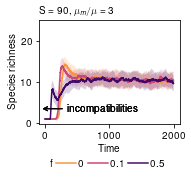

In [7]:
plt.rcParams.update(  {'figure.figsize': (7*cm,6*cm)})
sp_fig, axs = plt.subplots(1)
for c in range(len(case)):
    axs.plot(TT,igtavg[c],c=colorlist[c],label=labels2[c]) #c=cmap(c)
    axs.fill_between(TT, igtavg[c]+igtstd[c], igtavg[c]-igtstd[c], facecolor=colorlist[c], alpha=0.2)
#     axs.grid(linestyle='--')
    axs.set_xlabel('Time')
    axs.set_ylabel('Species richness',fontsize=font_size)
    axs.annotate("", xy=(-70, 3.5), xycoords='data', xytext=(300, 3.5),textcoords='data',arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
    axs.text(350, 3.5, r"incompatibilities", ha="left", va="center", size=font_size)
axs.set_ylim(-0.2,25)
    
axs.text(0,1.08,"S = 90, $\mu_m/\mu=3$",horizontalalignment='left',verticalalignment='center',size=font_size,transform = axs.transAxes,weight="bold")
h, l = axs.get_legend_handles_labels()
ph = [plt.plot([],marker="", ls="")[0]]
handles = ph + h
labels = ["f"] + l
leg=sp_fig.legend(handles, labels, ncol=4,columnspacing=0.4,handletextpad=0.2,loc="lower center", bbox_to_anchor=(0.55,-0.08),fontsize=10,frameon=False)
for vpack in leg._legend_handle_box.get_children()[:1]:
    for hpack in vpack.get_children():
        hpack.get_children()[0].set_width(0)

sp_fig.patch.set_facecolor('xkcd:white')
plt.tight_layout()
plt.show()

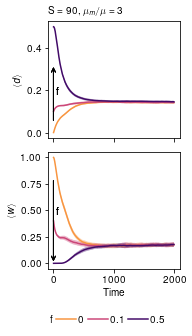

In [25]:
plt.rcParams.update(  {'figure.figsize': (7*cm,11*cm)})
dfig, axs = plt.subplots(2,1)

plt.setp(axs[0].get_xticklabels(), visible=False)

for c in range(len(case)):
    axs[0].plot(TT,distavg[c],c=colorlist[c],label=labels2[c])
    axs[0].fill_between(TT, distavg[c]+diststd[c], distavg[c]-diststd[c], facecolor=colorlist[c], alpha=0.4)
    axs[0].set_ylabel(r' $\langle d \rangle$',fontsize=font_size)
    axs[0].annotate("", xy=(0, 0.32), xycoords='data', xytext=(0, 0.05),textcoords='data',arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
    axs[0].text(70, 0.19, r"f", ha="center", va="center", size=font_size)
    
    axs[1].plot(TT,fitavg[c],c=colorlist[c])
    axs[1].fill_between(TT, fitavg[c]+fitstd[c], fitavg[c]-fitstd[c], facecolor=colorlist[c], alpha=0.4)
    axs[1].set_ylabel(r' $\langle w \rangle$',fontsize=font_size)
    axs[1].annotate("", xy=(0, 0), xycoords='data', xytext=(0, 0.8),textcoords='data',arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
    axs[1].text(70, 0.48, r"f", ha="center", va="center", size=font_size)
    
# axs[0].set_ylim(0.12,0.53)
# axs[1].set_ylim(-0.01,0.28)

axs[0].text(0,1.08,"S = 90, $\mu_m/\mu=3$",horizontalalignment='left',verticalalignment='center',size=font_size,transform = axs[0].transAxes,weight="bold")
h, l = axs[0].get_legend_handles_labels()
ph = [plt.plot([],marker="", ls="")[0]]
handles = ph + h
labels = [r"f"] + l
leg=dfig.legend(handles, labels, ncol=5,columnspacing=0.4,handletextpad=0.2,loc="lower center", bbox_to_anchor=(0.55,-0.08),fontsize=10,frameon=False)
for vpack in leg._legend_handle_box.get_children()[:1]:
    for hpack in vpack.get_children():
        hpack.get_children()[0].set_width(0)
dfig.patch.set_facecolor('xkcd:white')

plt.xlabel('Time')
plt.tight_layout()